In [1]:
import pandas as pd
import numpy as np

https://realpython.com/pandas-settingwithcopywarning/

In [2]:
data = {
    "x": 2 ** np.arange(5),
    "y": 3 ** np.arange(5),
    "z": np.array([45, 98, 24, 11, 64]),
}

index = ["a", "b", "c", "d", "e"]

df = pd.DataFrame(data=data, index=index)

In [3]:
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24
d,8,27,11
e,16,81,64


In [4]:
df["y"].iloc[2] = 999

In [5]:
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,999,24
d,8,27,11
e,16,81,64


In [6]:
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,999,24
d,8,27,11
e,16,81,64


In [7]:
mask = df["z"] < 50

df[mask]

,x,y,z
a,1,1,45
c,4,999,24
d,8,27,11


If you try to change df by extracting rows a, c, and d using mask, you’ll get a SettingWithCopyWarning, and df will remain the same:

In [8]:
df[mask]["z"] = 0

df

/home/masoud/anaconda3/envs/backtest_btrading/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,y,z
a,1,1,45
b,2,3,98
c,4,999,24
d,8,27,11
e,16,81,64


In [9]:
df = pd.DataFrame(data=data, index=index)

In [10]:
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24
d,8,27,11
e,16,81,64


In [11]:
df[mask]["z"] = 0

df

/home/masoud/anaconda3/envs/backtest_btrading/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24
d,8,27,11
e,16,81,64


In [12]:
df.loc[mask, "z"] = 0

df

,x,y,z
a,1,1,0
b,2,3,98
c,4,9,0
d,8,27,0
e,16,81,64


In [14]:
df["z"].loc[mask] = 0

In [13]:
df.loc[mask]["z"] = 0

/home/masoud/anaconda3/envs/backtest_btrading/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df

,x,y,z
a,1,1,0
b,2,3,98
c,4,9,0
d,8,27,0
e,16,81,64


When you slice a NumPy array, you get a view of the array:

In [13]:
arr = np.array([1, 2, 4, 8, 16, 32])

In [14]:
a = arr[1:3]

In [15]:
a.base

array([ 1,  2,  4,  8, 16, 32])

In [16]:
a.base is arr

True

In [17]:
a.flags.owndata

False

In [18]:
b = arr[1:4:2]

In [19]:
b.base

array([ 1,  2,  4,  8, 16, 32])

In [20]:
b.base is arr

True

In [21]:
b.flags.owndata

False

Indexing an array with a list of integers returns a copy of the original array

In [22]:
c = arr[[1, 3]]

In [23]:
c.base is None

True

In [24]:
c.flags.owndata

True

You can also index NumPy arrays with mask arrays or lists. Masks are Boolean arrays or lists of the same shape as the original. You’ll get a copy of the original array that contains only the elements that correspond to the True values of the mask:

In [25]:
mask = [False, True, False, True, False, False]

In [26]:
d = arr[mask]

In [27]:
d.base is None

True

In [28]:
d.flags.owndata

True

In [29]:
# `arr` is the original array:
arr = np.array([1, 2, 4, 8, 16, 32])

# `a` and `b` are views created through slicing:
a = arr[1:3]
b = arr[1:4:2]

# `c` and `d` are copies created through integer and Boolean indexing:
c = arr[[1, 3]]
d = arr[[False, True, False, True, False, False]]

Referencing data returns views when slicing arrays and copies when using index and mask arrays. Assignments, on the other hand, always modify the original data of the array.

In [31]:
arr[1] = 64

In [33]:
arr, a, b, c, d

(array([ 1, 64,  4,  8, 16, 32]),
 array([64,  4]),
 array([64,  8]),
 array([2, 8]),
 array([2, 8]))

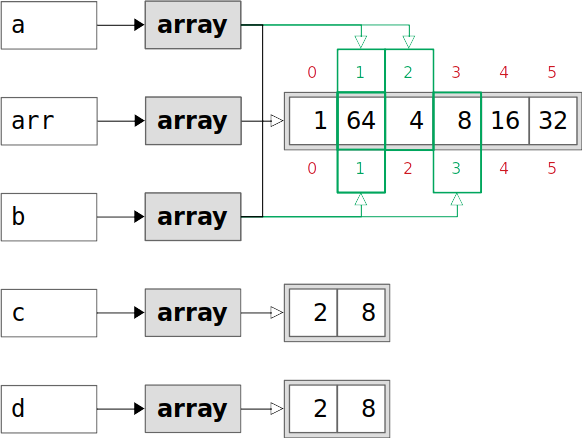

In the first case, arr[1:4:2] returns a view that references the data of arr and contains the elements 2 and 8. The statement arr[1:4:2][0] = 64 modifies the first of these elements to 64. The change is visible in both arr and the view returned by arr[1:4:2].

In the second case, arr[[1, 3]] returns a copy that also contains the elements 2 and 8. But these aren’t the same elements as in arr. They’re new ones. arr[[1, 3]][0] = 64 modifies the copy returned by arr[[1, 3]] and leaves arr unchanged.

In [35]:
arr = np.array([1, 2, 4, 8, 16, 32])
arr[1:4:2][0] = 64
arr

array([ 1, 64,  4,  8, 16, 32])

In [36]:
arr = np.array([1, 2, 4, 8, 16, 32])
arr[[1, 3]][0] = 64
arr

array([ 1,  2,  4,  8, 16, 32])

### Multidimensional Arrays

Referencing multidimensional arrays follows the same principles:

- Slicing arrays returns views.
- Using index and mask arrays returns copies.
- Combining index and mask arrays with slicing is also possible. In such cases, you get copies.

In [39]:
arr = np.array([[1, 2, 4, 8], [16, 32, 64, 128], [256, 512, 1024, 2048]])
arr

array([[   1,    2,    4,    8],
       [  16,   32,   64,  128],
       [ 256,  512, 1024, 2048]])

In [40]:
a = arr[:, 1:3]  # Take columns 1 and 2
a, a.base, a.base is arr

(array([[   2,    4],
        [  32,   64],
        [ 512, 1024]]),
 array([[   1,    2,    4,    8],
        [  16,   32,   64,  128],
        [ 256,  512, 1024, 2048]]),
 True)

In [41]:
b = arr[:, 1:4:2]  # Take columns 1 and 3
b, b.base, b.base is arr

(array([[   2,    8],
        [  32,  128],
        [ 512, 2048]]),
 array([[   1,    2,    4,    8],
        [  16,   32,   64,  128],
        [ 256,  512, 1024, 2048]]),
 True)

In [42]:
c = arr[:, [1, 3]]  # Take columns 1 and 3
c, c.base, c.base is arr

(array([[   2,    8],
        [  32,  128],
        [ 512, 2048]]),
 array([[   2,   32,  512],
        [   8,  128, 2048]]),
 False)

In [43]:
d = arr[:, [False, True, False, True]]  # Take columns 1 and 3
d, d.base, d.base is arr

(array([[   2,    8],
        [  32,  128],
        [ 512, 2048]]),
 array([[   2,   32,  512],
        [   8,  128, 2048]]),
 False)

In [44]:
arr[0, 1] = 100

In [45]:
arr, a, b, c, d

(array([[   1,  100,    4,    8],
        [  16,   32,   64,  128],
        [ 256,  512, 1024, 2048]]),
 array([[ 100,    4],
        [  32,   64],
        [ 512, 1024]]),
 array([[ 100,    8],
        [  32,  128],
        [ 512, 2048]]),
 array([[   2,    8],
        [  32,  128],
        [ 512, 2048]]),
 array([[   2,    8],
        [  32,  128],
        [ 512, 2048]]))

Pandas heavily relies on NumPy arrays but offers additional functionality and flexibility. Because of that, the rules for returning views and copies are more complex and less straightforward. They depend on the layout of data, data types, and other details. In fact, Pandas often doesn’t guarantee whether a view or copy will be referenced.

two examples of how Pandas behaves similarly to NumPy. First, you can see that accessing the first three rows of df with a slice returns a view:

In [46]:
df = pd.DataFrame(data=data, index=index)

In [50]:
# This view looks at the same data as df.
df["a":"c"]

,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24


In [51]:
df["a":"c"].to_numpy().base

array([[ 1,  2,  4,  8, 16],
       [ 1,  3,  9, 27, 81],
       [45, 98, 24, 11, 64]])

In [52]:
df["a":"c"].to_numpy().base is df.to_numpy().base

True

On the other hand, accessing the first two columns of df with a list of labels returns a copy:

In [53]:
df = pd.DataFrame(data=data, index=index)
df[["x", "y"]]

,x,y
a,1,1
b,2,3
c,4,9
d,8,27
e,16,81


In [54]:
df[["x", "y"]].to_numpy().base is df.to_numpy().base

False

Pandas can issue a SettingWithCopyWarning when you try to modify the copy of data instead of the original. This often follows chained indexing.

### Chained Indexing and SettingWithCopyWarning

The assignment df[mask]["z"] = 0 fails.

In [55]:
df = pd.DataFrame(data=data, index=index)

In [56]:
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24
d,8,27,11
e,16,81,64


In [59]:
mask = df["z"] < 50

In [60]:
df[mask]["z"] = 0

/home/masoud/anaconda3/envs/fidibo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24
d,8,27,11
e,16,81,64


The assignment fails because df[mask] returns a copy. To be more precise, the assignment is made on the copy, and df isn’t affected.

You’ve also seen that in Pandas, **evaluation order matters**. In some cases, you can switch the order of operations to make the code work:

In [62]:
df["z"][mask] = 0

In [63]:
df

,x,y,z
a,1,1,0
b,2,3,98
c,4,9,0
d,8,27,0
e,16,81,64


Using the accessors is recommended, but you can run into trouble with them as well:

In [64]:
df = pd.DataFrame(data=data, index=index)

In [65]:
df.loc[mask]["z"] = 0

/home/masoud/anaconda3/envs/fidibo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24
d,8,27,11
e,16,81,64


In this case, df.loc[mask] returns a copy, the assignment fails, and Pandas correctly issues the warning.

In some cases, Pandas fails to detect the problem and the assignment on the copy passes without a SettingWithCopyWarning:

Here, you don’t receive a SettingWithCopyWarning and df isn’t changed because df.loc[["a", "c", "e"]] uses a list of indices and returns a copy, not a view.

In [68]:
df = pd.DataFrame(data=data, index=index)
df.loc[["a", "c", "e"]]["z"] = 0  # Assignment fails, no warning
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24
d,8,27,11
e,16,81,64


There are some cases in which the code works, but Pandas issues the warning anyway:

In [69]:
df = pd.DataFrame(data=data, index=index)

In [71]:
df[:3]["z"] = 0  # Assignment succeeds, with warning
df

/home/masoud/anaconda3/envs/fidibo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,y,z
a,1,1,0
b,2,3,0
c,4,9,0
d,8,27,11
e,16,81,64


In [73]:
df = pd.DataFrame(data=data, index=index)
df.loc["a":"c"]["z"] = 0  # Assignment succeeds, with warning
df

/home/masoud/anaconda3/envs/fidibo/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x,y,z
a,1,1,0
b,2,3,0
c,4,9,0
d,8,27,11
e,16,81,64


The recommended way of performing such operations is to avoid chained indexing. Accessors can be of great help with that:

In [74]:
df = pd.DataFrame(data=data, index=index)
df.loc[mask, "z"] = 0
df

,x,y,z
a,1,1,0
b,2,3,98
c,4,9,0
d,8,27,0
e,16,81,64


#### Impact of Data Types on Views, Copies, and the SettingWithCopyWarning
In Pandas, the difference between creating views and creating copies also depends on the data types used. When deciding if it’s going to return a view or copy, Pandas handles DataFrames that have a single data type differently from ones with multiple types.

In [76]:
df = pd.DataFrame(data=data, index=index)

In [77]:
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,9,24
d,8,27,11
e,16,81,64


In [78]:
df.dtypes

x    int64
y    int64
z    int64
dtype: object

You’ve created the DataFrame with all integer columns. The fact that all three columns have the same data types is important here! In this case, you can select rows with a slice and get a view:

In [80]:
df["b":"d"]["z"] = 0
df

/home/masoud/anaconda3/envs/fidibo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,y,z
a,1,1,45
b,2,3,0
c,4,9,0
d,8,27,0
e,16,81,64


If your DataFrame contains columns of different types, then you might get a copy instead of a view, in which case the same assignment will fail:

In [82]:
df = pd.DataFrame(data=data, index=index).astype(dtype={"z": float})
df

,x,y,z
a,1,1,45.0
b,2,3,98.0
c,4,9,24.0
d,8,27,11.0
e,16,81,64.0


In [83]:
df.dtypes

x      int64
y      int64
z    float64
dtype: object

In [84]:
df["b":"d"]["z"] = 0

/home/masoud/anaconda3/envs/fidibo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df

,x,y,z
a,1,1,45.0
b,2,3,98.0
c,4,9,24.0
d,8,27,11.0
e,16,81,64.0


Contrary to the previous example, df["b":"d"] now returns a copy, so the assignment df["b":"d"]["z"] = 0 fails and df remains unchanged.

When in doubt, avoid the confusion and use the .loc[], .iloc[], .at[], and .iat[] access methods throughout your code!

To understand whether a frame is a view of a copy, you can use the internal _is_view and _is_copy methods of a pandas.DataFrame. The first one returns a boolean, while the second either a weakref to the original DataFrame, or None.

In [97]:
def get_data():
    df = pd.DataFrame({"A": range(0, 5), "B": range(10, 15), "C": range(100, 105)})
    return df


X = get_data()

In [98]:
X

,A,B,C
0,0,10,100
1,1,11,101
2,2,12,102
3,3,13,103
4,4,14,104


In [99]:
X[X["B"] > 12]

,A,B,C
3,3,13,103
4,4,14,104


In [100]:
X[X["B"] > 12]["C"] = 999

/home/masoud/anaconda3/envs/fidibo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
X

,A,B,C
0,0,10,100
1,1,11,101
2,2,12,102
3,3,13,103
4,4,14,104


In [102]:
X.loc[X["B"] > 12]["C"] == 999

3    False
4    False
Name: C, dtype: bool

In [103]:
X

,A,B,C
0,0,10,100
1,1,11,101
2,2,12,102
3,3,13,103
4,4,14,104


In [104]:
X.loc[X["B"] > 12, "C"] = 999
X

,A,B,C
0,0,10,100
1,1,11,101
2,2,12,102
3,3,13,999
4,4,14,999


In [10]:
df

,x,y,z
a,1,1,45
b,2,3,98
c,4,999,24
d,8,27,11
e,16,81,64


In [11]:
df.iat[0, df.columns.get_loc("z")] = 33

In [12]:
df

,x,y,z
a,1,1,33
b,2,3,98
c,4,999,24
d,8,27,11
e,16,81,64
